In [56]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv("/content/drive/MyDrive/FINPRO EDM 1/dataX_gibran.csv", index_col=0)
df

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Mon Dec 25 11:29:06 +0000 2023,1739246886425694408,"Gibran bikin Solo eksis, Cak Imin mungkin masi...",0,0,0,0,in,1678809428504743938,1739246886425694408,jaenabeti261330,https://twitter.com/jaenabeti261330/status/173...
1,Mon Dec 25 11:29:02 +0000 2023,1739246873620389900,"Gibran berhasil bikin Solo eksis, Cak Imin mun...",0,0,0,0,in,1678681664615227392,1739246873620389900,AsepSusant,https://twitter.com/AsepSusant/status/17392468...
2,Mon Dec 25 11:28:59 +0000 2023,1739246860181897634,"Gibran bikin Solo jadi pusat perhatian, Cak Im...",0,0,0,0,in,1678338299054919680,1739246860181897634,nawang_nugroho,https://twitter.com/nawang_nugroho/status/1739...
3,Mon Dec 25 11:28:57 +0000 2023,1739246851415740469,"@VIVAcoid Urang Jabar, naha ikhlas disebut keu...",0,0,0,0,in,1493831656469409796,1739234052711047409,h68052,https://twitter.com/h68052/status/173924685141...
4,Mon Dec 25 11:28:57 +0000 2023,1739246851168284898,"Gibran gesit, Cak Imin agak lambat Kira-kira h...",0,0,0,0,in,1673581261791854594,1739246851168284898,elisuwarsih,https://twitter.com/elisuwarsih/status/1739246...
...,...,...,...,...,...,...,...,...,...,...,...,...
363,Mon Dec 25 11:06:24 +0000 2023,1739241176497267013,@VIVAcoid lahhh katanya silahkan cek di gugel ...,0,0,0,0,in,1640312632031985666,1739203845719515410,zidnsptra,https://twitter.com/zidnsptra/status/173924117...
364,Mon Dec 25 11:06:23 +0000 2023,1739241170121929179,@Dimasjoko12 @bentangnegeri @gibran Yang penti...,0,2,0,0,in,1534200395009904640,1738452737879376073,Gr4sssss,https://twitter.com/Gr4sssss/status/1739241170...
365,Mon Dec 25 11:05:49 +0000 2023,1739241029432418730,Solo membuktikan bahwa Prabowo - Gibran punya ...,0,0,0,0,in,1678709385529524224,1739241029432418730,soemardihasan,https://twitter.com/soemardihasan/status/17392...
366,Mon Dec 25 11:05:46 +0000 2023,1739241015922610469,@janganlupasans @racunsay @gibran_tweet tapi f...,0,0,0,0,in,4046649492,1738915961129029791,nilrofficial,https://twitter.com/nilrofficial/status/173924...


In [58]:
df = df[['full_text', 'username', 'created_at']]
df

,full_text,username,created_at
0,"Gibran bikin Solo eksis, Cak Imin mungkin masi...",jaenabeti261330,Mon Dec 25 11:29:06 +0000 2023
1,"Gibran berhasil bikin Solo eksis, Cak Imin mun...",AsepSusant,Mon Dec 25 11:29:02 +0000 2023
2,"Gibran bikin Solo jadi pusat perhatian, Cak Im...",nawang_nugroho,Mon Dec 25 11:28:59 +0000 2023
3,"@VIVAcoid Urang Jabar, naha ikhlas disebut keu...",h68052,Mon Dec 25 11:28:57 +0000 2023
4,"Gibran gesit, Cak Imin agak lambat Kira-kira h...",elisuwarsih,Mon Dec 25 11:28:57 +0000 2023
...,...,...,...
363,@VIVAcoid lahhh katanya silahkan cek di gugel ...,zidnsptra,Mon Dec 25 11:06:24 +0000 2023
364,@Dimasjoko12 @bentangnegeri @gibran Yang penti...,Gr4sssss,Mon Dec 25 11:06:23 +0000 2023
365,Solo membuktikan bahwa Prabowo - Gibran punya ...,soemardihasan,Mon Dec 25 11:05:49 +0000 2023
366,@janganlupasans @racunsay @gibran_tweet tapi f...,nilrofficial,Mon Dec 25 11:05:46 +0000 2023


CLEANING DATA

In [59]:
df.shape

(368, 3)

In [60]:
df = df.drop_duplicates(subset=['full_text'])

In [61]:
df.duplicated().sum()

0

In [62]:
df = df.dropna()

In [63]:
df.isnull().sum()

full_text     0
username      0
created_at    0
dtype: int64

In [64]:
df.shape

(368, 3)

In [65]:
def clean_x_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'#\+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?://\S+', '', text)

  text = re.sub(r'[^A-Za-z0-9\s]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()
  return text
df['full_text'] = df['full_text'].apply(clean_x_text)

In [66]:
df['full_text'] = df['full_text'].str.lower()
df

,full_text,username,created_at
0,gibran bikin solo eksis cak imin mungkin masih...,jaenabeti261330,Mon Dec 25 11:29:06 +0000 2023
1,gibran berhasil bikin solo eksis cak imin mung...,AsepSusant,Mon Dec 25 11:29:02 +0000 2023
2,gibran bikin solo jadi pusat perhatian cak imi...,nawang_nugroho,Mon Dec 25 11:28:59 +0000 2023
3,urang jabar naha ikhlas disebut keun bakal nga...,h68052,Mon Dec 25 11:28:57 +0000 2023
4,gibran gesit cak imin agak lambat kirakira har...,elisuwarsih,Mon Dec 25 11:28:57 +0000 2023
...,...,...,...
363,lahhh katanya silahkan cek di gugel udah banya...,zidnsptra,Mon Dec 25 11:06:24 +0000 2023
364,yang penting bukan petugas partai apalagi bokeper,Gr4sssss,Mon Dec 25 11:06:23 +0000 2023
365,solo membuktikan bahwa prabowo gibran punya re...,soemardihasan,Mon Dec 25 11:05:49 +0000 2023
366,tapi fans nya yg muslim pada gaterima beliau d...,nilrofficial,Mon Dec 25 11:05:46 +0000 2023


Preprocessing

a. Normalisasi

In [67]:
norm = {' gugel ':' google ', ' yg ':' yang ', " spt ":"seperti", 'lahhh':' ', ' gt ':' gitu ', ' skrg ':' sekarang ', ' cth ':' contoh ', ' aniesmuhaimin ':' anies muhaimin ', ' ganjar ':' ', ' mahfud ':' ', 'ganjarmahfud':' ', ' ganjarmahfud ':' ', 'aniesmuhaimin ':' ', ' muhaimin ':' ', ' anies ':' ', ' prabowo ':' ', ' ganjar ':' '}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df

,full_text,username,created_at
0,gibran bikin solo eksis cak imin mungkin masih...,jaenabeti261330,Mon Dec 25 11:29:06 +0000 2023
1,gibran berhasil bikin solo eksis cak imin mung...,AsepSusant,Mon Dec 25 11:29:02 +0000 2023
2,gibran bikin solo jadi pusat perhatian cak imi...,nawang_nugroho,Mon Dec 25 11:28:59 +0000 2023
3,urang jabar naha ikhlas disebut keun bakal nga...,h68052,Mon Dec 25 11:28:57 +0000 2023
4,gibran gesit cak imin agak lambat kirakira har...,elisuwarsih,Mon Dec 25 11:28:57 +0000 2023
...,...,...,...
363,katanya silahkan cek di google udah banyak s...,zidnsptra,Mon Dec 25 11:06:24 +0000 2023
364,yang penting bukan petugas partai apalagi bokeper,Gr4sssss,Mon Dec 25 11:06:23 +0000 2023
365,solo membuktikan bahwa gibran punya rencana ek...,soemardihasan,Mon Dec 25 11:05:49 +0000 2023
366,tapi fans nya yang muslim pada gaterima beliau...,nilrofficial,Mon Dec 25 11:05:46 +0000 2023


b. Stopword

In [68]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.9 MB/s eta 0:00:00


In [71]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["tidak"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df

,full_text,username,created_at
0,gibran bikin solo eksis cak imin mungkin menca...,jaenabeti261330,Mon Dec 25 11:29:06 +0000 2023
1,gibran berhasil bikin solo eksis cak imin mung...,AsepSusant,Mon Dec 25 11:29:02 +0000 2023
2,gibran bikin solo jadi pusat perhatian cak imi...,nawang_nugroho,Mon Dec 25 11:28:59 +0000 2023
3,urang jabar naha ikhlas disebut keun bakal nga...,h68052,Mon Dec 25 11:28:57 +0000 2023
4,gibran gesit cak imin lambat kirakira harusnya...,elisuwarsih,Mon Dec 25 11:28:57 +0000 2023
...,...,...,...
363,katanya silahkan cek google udah banyak swas...,zidnsptra,Mon Dec 25 11:06:24 +0000 2023
364,penting bukan petugas partai bokeper,Gr4sssss,Mon Dec 25 11:06:23 +0000 2023
365,solo membuktikan gibran punya rencana ekonomi ...,soemardihasan,Mon Dec 25 11:05:49 +0000 2023
366,fans nya muslim gaterima beliau dibaptis jadi ...,nilrofficial,Mon Dec 25 11:05:46 +0000 2023


c. Tokenize

In [72]:
tokenized = df['full_text'].apply(lambda x:x.split())
tokenized

0      [gibran, bikin, solo, eksis, cak, imin, mungki...
1      [gibran, berhasil, bikin, solo, eksis, cak, im...
2      [gibran, bikin, solo, jadi, pusat, perhatian, ...
3      [urang, jabar, naha, ikhlas, disebut, keun, ba...
4      [gibran, gesit, cak, imin, lambat, kirakira, h...
                             ...                        
363    [katanya, silahkan, cek, google, udah, banyak,...
364           [penting, bukan, petugas, partai, bokeper]
365    [solo, membuktikan, gibran, punya, rencana, ek...
366    [fans, nya, muslim, gaterima, beliau, dibaptis...
367    [solo, sukses, bawah, gibran, bukti, perubahan...
Name: full_text, Length: 368, dtype: object

d. Stemming

In [73]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)
tokenized.to_csv("/content/drive/MyDrive/FINPRO EDM 1/dataprepocessing_gibran.csv", index=False)

gibran bikin solo eks cak imin mungkin cari panggung politik pas
gibran hasil bikin solo eks cak imin mungkin ajar cara tampil layar politik
gibran bikin solo jadi pusat perhati cak imin nampaknya sibuk nyari kipas angin dunia politik
urang jabar naha ikhlas sebut keun bakal ngadukung gibran ulah poho 2019 dibobodo prabowo
gibran gesit cak imin lambat kirakira harus gimana nih
ekonomi solo roket terima kasih gibran jakarta jateng maksimal bawah muhaimin
gibran bikin solo kini cak imin mungkin sibuk cari tempat duduk nyaman arena politik
gibran bikin solo gemilang bikin geming
gibran paham cak imin kayak butuh kelas ekonomi
gibran bikin solo eks cak imin mungkin sibuk cari stasiun politik naik tangga sukses
pingin liat gibran debatin si den wadas wan ngibul
gibran efisien cak imin mungkin perlu ajar manajemen waktu
temenku bela mati gibran abis muter ulang nih debat pas lagi ngantorceritanya mau bahas apa isi debat cawapresgregetan denger statement gibran jangan serang orang ungkap gak 

Translating

In [74]:
!pip install translate

In [75]:
data = pd.read_csv('/content/drive/MyDrive/FINPRO EDM 1/dataprepocessing_gibran.csv')
data

,full_text
0,gibran bikin solo eks cak imin mungkin cari pa...
1,gibran hasil bikin solo eks cak imin mungkin a...
2,gibran bikin solo jadi pusat perhati cak imin ...
3,urang jabar naha ikhlas sebut keun bakal ngadu...
4,gibran gesit cak imin lambat kirakira harus gi...
...,...
363,kata silah cek google udah banyak swasta inves...
364,penting bukan tugas partai bokeper
365,solo bukti gibran punya rencana ekonomi bisa b...
366,fans nya muslim gaterima beliau baptis jadi yo...


In [76]:
from translate import Translator

def convert_eng(tweet):
  translator = Translator(to_lang="en", from_lang="id")
  translation = translator.translate(tweet)
  return translation

data['tweet_english'] = data['full_text'].apply(convert_eng)
data.to_csv("/content/drive/MyDrive/FINPRO EDM 1/datatranslate_gibran.csv")

Labelling

In [77]:
data = pd.read_csv("/content/drive/MyDrive/FINPRO EDM 1/datatranslate_gibran.csv", index_col=0)
data

,full_text,tweet_english
0,gibran bikin solo eks cak imin mungkin cari pa...,gibran make solo ex cak imin maybe find a poli...
1,gibran hasil bikin solo eks cak imin mungkin a...,gibran results make solo ex cak imin maybe tea...
2,gibran bikin solo jadi pusat perhati cak imin ...,gibran makes solo the center of attention of c...
3,urang jabar naha ikhlas sebut keun bakal ngadu...,urang jabar naha ikhlas said keun would suppor...
4,gibran gesit cak imin lambat kirakira harus gi...,gibran nimble cak imin slow kirakira should ya
...,...,...
363,kata silah cek google udah banyak swasta inves...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
364,penting bukan tugas partai bokeper,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
365,solo bukti gibran punya rencana ekonomi bisa b...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
366,fans nya muslim gaterima beliau baptis jadi yo...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...


In [78]:
data = data.head(275)
data

,full_text,tweet_english
0,gibran bikin solo eks cak imin mungkin cari pa...,gibran make solo ex cak imin maybe find a poli...
1,gibran hasil bikin solo eks cak imin mungkin a...,gibran results make solo ex cak imin maybe tea...
2,gibran bikin solo jadi pusat perhati cak imin ...,gibran makes solo the center of attention of c...
3,urang jabar naha ikhlas sebut keun bakal ngadu...,urang jabar naha ikhlas said keun would suppor...
4,gibran gesit cak imin lambat kirakira harus gi...,gibran nimble cak imin slow kirakira should ya
...,...,...
270,uang nya alir hilir digital lama jadi usaha ma...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
271,siap dukung gibran 2024lihat video sinar alam ...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
272,hallo giring info loker,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
273,kurang jelas kan provokasi kena tegur 2x siapa...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...


In [80]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [81]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [82]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
  analysis = TextBlob(tweet)
  polaritas += analysis.polarity

  if analysis.sentiment.polarity > 0.0:
    total_positif += 1
    status.append('Positif')
  elif analysis.sentiment.polarity == 0.0:
    total_netral += 1
    status.append('Netral')
  else:
    total_negatif += 1
    status.append('Negatif')

  total += 1

print(f'Hasil analysis data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal data : {total}')

Hasil analysis data:
Positif = 169
Netral = 75
Negatif = 31

Total data : 275


In [83]:
data['klasifikasi'] = status
data

<ipython-input-83-7770f1968a96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['klasifikasi'] = status


,full_text,tweet_english,klasifikasi
0,gibran bikin solo eks cak imin mungkin cari pa...,gibran make solo ex cak imin maybe find a poli...,Positif
1,gibran hasil bikin solo eks cak imin mungkin a...,gibran results make solo ex cak imin maybe tea...,Netral
2,gibran bikin solo jadi pusat perhati cak imin ...,gibran makes solo the center of attention of c...,Netral
3,urang jabar naha ikhlas sebut keun bakal ngadu...,urang jabar naha ikhlas said keun would suppor...,Netral
4,gibran gesit cak imin lambat kirakira harus gi...,gibran nimble cak imin slow kirakira should ya,Negatif
...,...,...,...
270,uang nya alir hilir digital lama jadi usaha ma...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif
271,siap dukung gibran 2024lihat video sinar alam ...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif
272,hallo giring info loker,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif
273,kurang jelas kan provokasi kena tegur 2x siapa...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif


Visualisasi

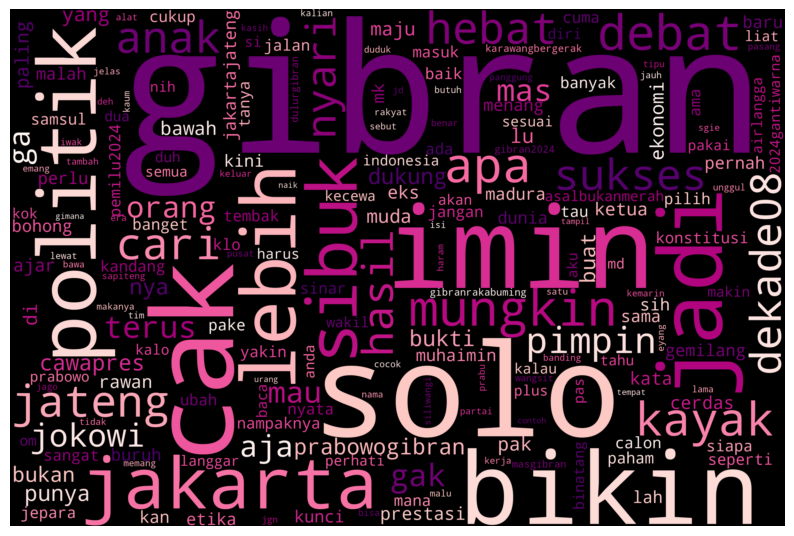

In [84]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
  plt.figure(figsize=(10, 8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

all_words = ' '.join([tweets for tweets in data['full_text']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='RdPu',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

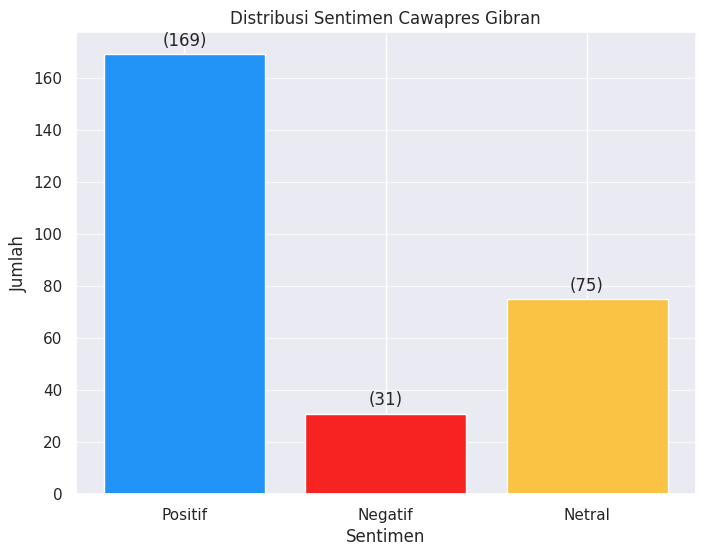

In [85]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f"({count})", xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()
show_bar_chart(labels, counts, "Distribusi Sentimen Cawapres Gibran")


Klasifikasi Naive Bayes

In [86]:
data

,full_text,tweet_english,klasifikasi
0,gibran bikin solo eks cak imin mungkin cari pa...,gibran make solo ex cak imin maybe find a poli...,Positif
1,gibran hasil bikin solo eks cak imin mungkin a...,gibran results make solo ex cak imin maybe tea...,Netral
2,gibran bikin solo jadi pusat perhati cak imin ...,gibran makes solo the center of attention of c...,Netral
3,urang jabar naha ikhlas sebut keun bakal ngadu...,urang jabar naha ikhlas said keun would suppor...,Netral
4,gibran gesit cak imin lambat kirakira harus gi...,gibran nimble cak imin slow kirakira should ya,Negatif
...,...,...,...
270,uang nya alir hilir digital lama jadi usaha ma...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif
271,siap dukung gibran 2024lihat video sinar alam ...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif
272,hallo giring info loker,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif
273,kurang jelas kan provokasi kena tegur 2x siapa...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif


In [87]:
dataset = data.drop(['full_text'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [88]:
import random

set_positif = []
set_negatif = []

set_netral = []

for n in dataset:
    if (n[1] == 'Positif'):
        set_positif.append(n)
    elif(n[1] == 'Negatif'):
        set_negatif.append(n)
    else:
        set_netral.append(n)

train_positif = random.sample(set_positif, k=int(len(set_positif)/2))
train_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
train_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = train_positif + train_negatif + train_netral

train_set = []

for n in train:
    train_set.append(n)

In [91]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print('Akurasi tes: ', cl.accuracy(dataset))

Akurasi tes:  0.6981818181818182


In [93]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet, classifier=cl)

    if analysis.classify() == 'Positif':
        total_positif += 1

    elif analysis.classify() == 'Netral':
        total_netral += 1

    else:
        total_negatif += 1

    status.append(analysis.classify())
    total += 1

print(f'\nHasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data: {total}')


Hasil Analisis Data:
Positif = 105
Netral = 155
Negatif = 15

Total Data: 275


In [94]:
status = pd.DataFrame({'klasifikasi_bayes': status})
data['klasifikasi_bayes'] = status

<ipython-input-94-59ffdbe4098c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['klasifikasi_bayes'] = status


In [95]:
data

,full_text,tweet_english,klasifikasi,klasifikasi_bayes
0,gibran bikin solo eks cak imin mungkin cari pa...,gibran make solo ex cak imin maybe find a poli...,Positif,Netral
1,gibran hasil bikin solo eks cak imin mungkin a...,gibran results make solo ex cak imin maybe tea...,Netral,Netral
2,gibran bikin solo jadi pusat perhati cak imin ...,gibran makes solo the center of attention of c...,Netral,Netral
3,urang jabar naha ikhlas sebut keun bakal ngadu...,urang jabar naha ikhlas said keun would suppor...,Netral,Netral
4,gibran gesit cak imin lambat kirakira harus gi...,gibran nimble cak imin slow kirakira should ya,Negatif,Netral
...,...,...,...,...
270,uang nya alir hilir digital lama jadi usaha ma...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif,Positif
271,siap dukung gibran 2024lihat video sinar alam ...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif,Positif
272,hallo giring info loker,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif,Positif
273,kurang jelas kan provokasi kena tegur 2x siapa...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif,Positif


In [96]:
data_eval = [tuple(x) for x in data.to_records(index=False)]

for n in data_eval:
    if len(n) >= 4:
        if n[2] != n[3]:
            print(f'Text: {n[0]}\nClassifier: {n[2]}\nClassifier Bayes: {n[3]}\n')
    else:
        print("Tuple doesn't have enough elements.")


Text: gibran bikin solo eks cak imin mungkin cari panggung politik pas
Classifier: Positif
Classifier Bayes: Netral

Text: gibran gesit cak imin lambat kirakira harus gimana nih
Classifier: Negatif
Classifier Bayes: Netral

Text: pingin liat gibran debatin si den wadas wan ngibul
Classifier: Negatif
Classifier Bayes: Netral

Text: temenku bela mati gibran abis muter ulang nih debat pas lagi ngantorceritanya mau bahas apa isi debat cawapresgregetan denger statement gibran jangan serang orang ungkap gak umum harus cak imin balas yo ndak tau kok tanya
Classifier: Negatif
Classifier Bayes: Netral

Text: gibran memang unggul solo jadi contoh hasil jakarta jateng introspeksi
Classifier: Positif
Classifier Bayes: Netral

Text: gibran bikin solo eks cak imin seperti sibuk cari jalan keluar buntu politik
Classifier: Positif
Classifier Bayes: Netral

Text: solo sukses berkat gibran jakarta jateng kayak perlu ubah besar
Classifier: Positif
Classifier Bayes: Netral

Text: asyik lahan basah nih kor

Testing

In [97]:
def classify_text(text, cl):
    analysis = TextBlob(text, classifier=cl)
    return analysis.classify()

data_tweet = list(data['tweet_english'])
polaritas = 0

input_text = input('\nMasukkan teks yang ingin diuji: ')
hasil_klasifikasi = classify_text(input_text, cl)

print("\nHasil Klasifikasi untuk Teks yang Dimasukkan: ", hasil_klasifikasi)



Masukkan teks yang ingin diuji: pilih pemimipin yang cerdas

Hasil Klasifikasi untuk Teks yang Dimasukkan:  Netral
